<b>Анализ среднего времени заказов ресторана при помощи A/B тестов </b>

Импортирую необходимые библиоотеи

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
sns.set(style='whitegrid')

Произвожу считывание данных и разведывательный анализ данных<br>
Описание данных<br>
order_id - id заказа<br>
delivery_time - время доставки в минутах<br>
district - район доставки<br>
experiment_group - экспериментальная группа<br>

In [15]:
df=pd.read_csv('experiment_lesson_4.csv')
df.head(5)

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [3]:
df.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


In [19]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.3+ KB


In [43]:
df.drop_duplicates()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [101]:
dft=df.query('experiment_group=="test"')
dfc=df.query('experiment_group=="control"')#тестовую и контрольные группы записываем в разные DataSet

In [109]:
dfc.info

<bound method DataFrame.info of        order_id  delivery_time  district experiment_group
0          3159           44.0  Purlieus          control
1         10426           51.0  Purlieus          control
2          9155           46.0  Purlieus          control
3         10699           34.0  Purlieus          control
4         10061           43.0  Purlieus          control
...         ...            ...       ...              ...
10087      2708           23.0   Central          control
10088      3918           45.0   Central          control
10089      9544           41.0    Suburb          control
10090      1101           38.0   Central          control
10091      7676           55.0   Central          control

[10092 rows x 4 columns]>

Произвожу визуализацию данных для контрольной и тестовой группы

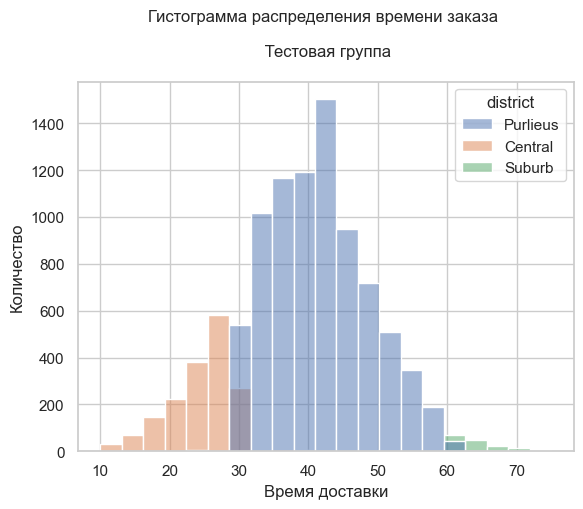

In [61]:
sns.histplot(data=dft,hue='district', x='delivery_time', bins=21) 
plt.title('Гистограмма распределения времени заказа \n \n Тестовая группа\n') 
plt.xlabel('Время доставки')
plt.ylabel('Количество')
plt.show()


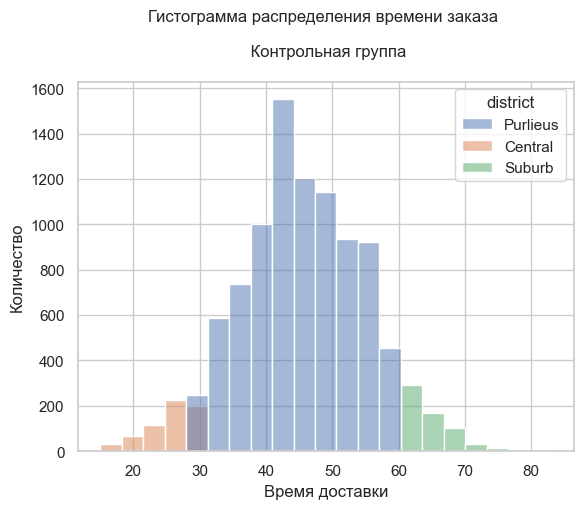

In [65]:
sns.histplot(data=dfc,hue='district', x='delivery_time', bins=21) 
plt.title('Гистограмма распределения времени заказа \n \n Контрольная группа\n') 
plt.xlabel('Время доставки')
plt.ylabel('Количество')
plt.show()

Для анализа данных выберем следующее метрики: среднее время доставки AVG(delivery_time)<br>
Сформулируем нулевую и альтернотивную гипотезу:<br>
Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет<br>
Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

Для применения T-теста стьюдента требуются следующие условия:<br>
1.Нормальный характер распределения изучаемых данных в обеих сравниваемых группах. Перед применением критерия Стьюдента нужно проверить нормальность распределения.<br>  
2.Равенство дисперсий сравниваемых групп

Произведем проверку нормальности распределения времени доставки контрольной и тестовой группы:

In [93]:
statistic,pvalue=ss.normaltest(dfc['delivery_time'])
if pvalue>=0.05:
    print(f'pvalue={pvalue},распределение контрольной группы является нормальным')
else:
    print(f'(pvalue={pvalue},распределение контрольной группы является не нормальным')

pvalue=0.8809549607809654,распределение контрольной группы является нормальным


In [95]:
statistic,pvalue=ss.normaltest(dft['delivery_time'])
if pvalue>=0.05:
    print(f'pvalue={pvalue},распределение тестовой группы является нормальным')
else:
    print(f'(pvalue={pvalue},распределение тестовой группы является не нормальным')

(pvalue=0.02983483685333173,распределение тестовой группы является не нормальным


Распределение тестовой группы не является нормальным, но выборка достаточна большая, более 30 следовательно можно использовать T-тесть Стюдента

Проверим равенство дисперсий контрольной и тестовой группы, для этогоприменим тест Левена

In [124]:
statistic,pvalue=ss.levene(dfc['delivery_time'],dft['delivery_time'])
if pvalue>=0.05:
    print(f'pvalue={pvalue},дисперсия в обоих группах равна, можно произвести Т-тест')
else:
    print(f'(pvalue={pvalue},дисперсия в обоих группах не равна')

pvalue=0.6031844931083392,дисперсия в обоих группах равна, можно произвести Т-тест


In [ ]:
Проверим Н0 с помощью Т-теста:

In [130]:
statistic,pvalue=ss.ttest_ind(dfc['delivery_time'],dft['delivery_time'])
if pvalue>=0.05:
    print(f'pvalue={pvalue},нулевая теория отвергается, среднее значение в двух группах статистически значимо не отличается')
else:
    print(f'pvalue={pvalue},нулевая теория подтверждается, среднее значение в двух группах статистически значимо отличаетсям')

pvalue=0.0,нулевая теория подтверждается, среднее значение в двух группах статистически значимо отличаетсям


Text(0, 0.5, 'Время доставки')

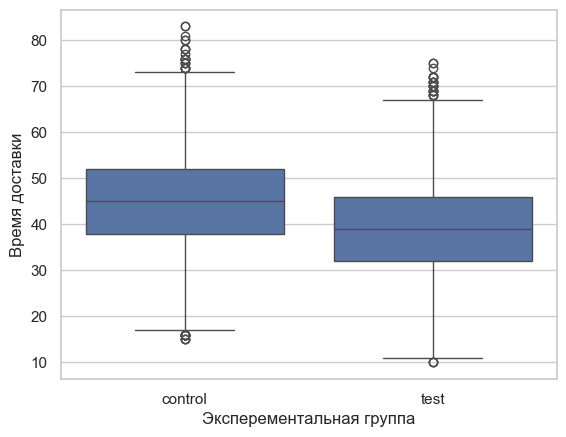

In [148]:
sns.boxplot(data=df,y='delivery_time', x='experiment_group')
plt.xlabel('Эксперементальная группа')
plt.ylabel('Время доставки')

In [146]:
delta=round((dfc['delivery_time'].mean()-dft['delivery_time'].mean())/dfc['delivery_time'].mean(),2)*100
print(f'Среднее время доставки уменьшилось на {delta}%, результат является статистически значимым')

Среднее время доставки уменьшилось на 13.0%, результат является статистически значимым
